Win %: 0.3854
Push %: 0.1283
Lost %: 0.4863


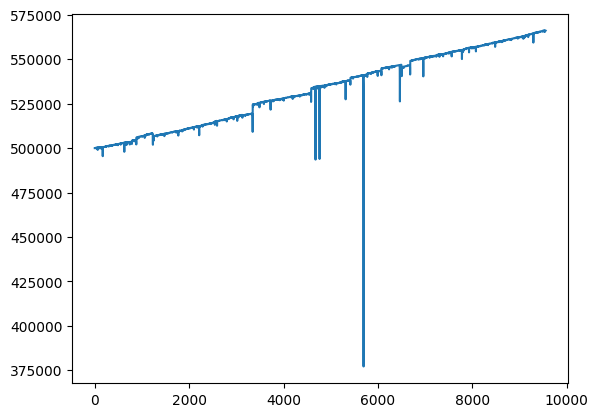

In [169]:
import random
from matplotlib import pyplot as plt
import matplotlib

hard_strategy = {8: ["H", "H", "H", "H", "H", "H", "H", "H", "H", "H"], 
                 9: ["H", "Dh", "Dh", "Dh", "Dh", "H", "H", "H", "H", "H"],
                 10: ["Dh", "Dh", "Dh", "Dh", "Dh", "Dh", "Dh", "Dh", "H", "H"],
                 11: ["Dh", "Dh", "Dh", "Dh", "Dh", "Dh", "Dh", "Dh", "Dh", "H"],
                 12: ["H", "H", "S", "S", "S", "H", "H", "H", "H", "H"],
                 13: ["S", "S", "S", "S", "S", "H", "H", "H", "H", "H"],
                 14: ["S", "S", "S", "S", "S", "H", "H", "H", "H", "H"],
                 15: ["S", "S", "S", "S", "S", "H", "H", "H", "H", "H"],
                 16: ["S", "S", "S", "S", "S", "H", "H", "H", "H", "H"],
                 17: ["S", "S", "S", "S", "S", "S", "S", "S", "S", "S"]}

soft_strategy = {12: ["H", "H", "H", "H", "H", "H", "H", "H", "H", "H"],
                 13: ["H", "H", "H", "Dh", "Dh", "H", "H", "H", "H", "H"],
                 14: ["H", "H", "H", "Dh", "Dh", "H", "H", "H", "H", "H"],
                 15: ["H", "H", "Dh", "Dh", "Dh", "H", "H", "H", "H", "H"],
                 16: ["H", "H", "Dh", "Dh", "Dh", "H", "H", "H", "H", "H"],
                 17: ["H", "Dh", "Dh", "Dh", "Dh", "H", "H", "H", "H", "H"],
                 18: ["S", "Ds", "Ds", "Ds", "Ds", "S", "S", "H", "H", "H"],
                 19: ["S", "S", "S", "S", "S", "S", "S", "S", "S", "S"],
                 20: ["S", "S", "S", "S", "S", "S", "S", "S", "S", "S"]}

split_strategy = {"2": ["Ph", "Ph", "P", "P", "P", "P", "H", "H", "H", "H"],
                  "3": ["Ph", "Ph", "P", "P", "P", "P", "H", "H", "H", "H"],
                  "4": ["H", "H", "H", "Ph", "Ph", "H", "H", "H", "H", "H"],
                  "6": ["Ph", "P", "P", "P", "P", "H", "H", "H", "H", "H"],
                  "7": ["P", "P", "P", "P", "P", "P", "H", "H", "H", "H"],
                  "8": ["P", "P", "P", "P", "P", "P", "P", "P", "P", "P"],
                  "9": ["P", "P", "P", "P", "P", "S", "P", "P", "S", "S"],
                  "A": ["P", "P", "P", "P", "P", "P", "P", "P", "P", "P"]}

def get_card_value(card):
    if card in ['K', 'Q', 'J']:
        return 10
    elif card == 'A':
        return 11
    else:
        return int(card)

def calculate_hand_value(hand):
    value = sum([get_card_value(card) for card in hand])
    num_aces = hand.count('A')

    while value > 21 and num_aces:
        value -= 10
        num_aces -= 1

    return value



def make_ai_decision(player_hand, dealer_upcard):

    dealer_value = get_card_value(dealer_upcard)
    player_value = calculate_hand_value(player_hand)
    # print(player_hand)
    # print(player_value)

    if player_hand[0] == player_hand[1] and player_hand[0] in split_strategy.keys():
        return split_strategy[player_hand[0]][dealer_value - 2]

    elif "A" in player_hand:
        return soft_strategy[player_value][dealer_value - 2]

    else:
        if player_value < 8:
            return hard_strategy[8][dealer_value - 2]
        elif player_value > 17:
            return hard_strategy[17][dealer_value - 2]
        else:
            return hard_strategy[player_value][dealer_value - 2]





def play_blackjack_recursive(player_hand, dealer_hand, deck):
    if calculate_hand_value(player_hand) > 20:
        return [calculate_hand_value(player_hand)]
    result = make_ai_decision(player_hand, dealer_hand[0])

    if result == "Dh":
        # Double down if possible, finish the hand
        if len(player_hand) == 2:
            player_hand.append(deck.pop())
            return [calculate_hand_value(player_hand)]
        else:
            return [calculate_hand_value(player_hand)]

    elif result == "Ds":
        # Double down if possible, finish the hand
        if len(player_hand) == 2:
            player_hand.append(deck.pop())
            return [calculate_hand_value(player_hand)]
        else:
            return [calculate_hand_value(player_hand)]

    elif result == "S":
        # Stand and end player turn
        return [calculate_hand_value(player_hand)]

    elif result == "H":
        # Hit, pop a card from the deck and add to hand
        player_hand.append(deck.pop())

        # Check if the total cards in hand are greater than or equal to 5
        # if len(player_hand) >= 5:
        #     return [calculate_hand_value(player_hand)]

        # Recursively continue with the same hand
        return play_blackjack_recursive(player_hand, dealer_hand, deck)

    elif result == "P":
        # Split the two cards into two hands, deal a new card to each
        hand1 = [player_hand[0], deck.pop()]
        hand2 = [player_hand[1], deck.pop()]

        # Recursively continue with each split hand
        result1 = play_blackjack_recursive(hand1, dealer_hand, deck)
        result2 = play_blackjack_recursive(hand2, dealer_hand, deck)

        # Combine the results of both hands
        return result1 + result2

    elif result == "Ph":
        # Split if double down after split is possible, otherwise hit and continue
        if len(player_hand) == 2:
            hand1 = [player_hand[0], deck.pop()]
            hand2 = [player_hand[1], deck.pop()]

            # Recursively continue with each split hand
            result1 = play_blackjack_recursive(hand1, dealer_hand, deck)
            result2 = play_blackjack_recursive(hand2, dealer_hand, deck)

            # Combine the results of both hands
            return result1 + result2
        else:
            player_hand.append(deck.pop())
            return play_blackjack_recursive(player_hand, dealer_hand, deck)

def play_blackjack(player_hand, dealer_hand, deck):
    # Start the recursive process for the main hand
    results = play_blackjack_recursive(player_hand, dealer_hand, deck)

    # Return the final value of each subhand in a list
    return results








def simulate(num_sims=10, initial_balance=500, max_balance=1000, max_trials=100, initial_bet=10, print_ = False):
    for i in range(num_sims):

        # Initialize bet and play 100 games or until the AI can no longer bet
        bet = initial_bet
        total_games = 0
        total_won = 0
        number_won = 0
        number_lost = 0
        peak_balance = 0
        balance = initial_balance
        all_balances = [balance]
        
        while total_games < max_trials and balance >= bet and balance < max_balance:
            total_games += 1
            if print_:
                print(f"\n\n==== Game {total_games} - Balance: ${balance} - Current Bet: ${bet} ====")
    
            # Shuffle the deck
            deck = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A'] * 4 * 4
            random.shuffle(deck)
    
            # Initialize hands for the player and the dealer
            player_hand = [deck.pop(), deck.pop()]
            dealer_hand = [deck.pop(), deck.pop()]
    
            if print_:
                print("\nPlayer Hand:", player_hand)
                print("Dealer Card:", dealer_hand[0])
    
            if calculate_hand_value(player_hand) == 21:
                total_won += bet * 1.5
                balance += bet * 1.5
                bet = initial_bet
            
            else:
    
                # Player's turn
                final_hand_values = play_blackjack(player_hand, dealer_hand, deck)
    
                # Dealer's turn
                while calculate_hand_value(dealer_hand) < 17 or (calculate_hand_value(dealer_hand) == 17 and 'A' in dealer_hand):
                    dealer_hand.append(deck.pop())
    
                if print_:
                    print("\nPlayer Hand Values:", final_hand_values)
                    print("Dealer Hand Value:", calculate_hand_value(dealer_hand))
                    print()
    
                total_result = 0
                for hand_value in final_hand_values:    
                          
                    # Determine the winner
                    if hand_value > 21:
                        if print_:
                            print("Bust! You lose.               ->         -" + str(bet))
                        total_result -= bet
    
                    elif calculate_hand_value(dealer_hand) > 21:
                        if print_:
                            print("Dealer bust! You win!         ->         +" + str(bet))
                        total_result += bet
    
                    elif hand_value > calculate_hand_value(dealer_hand):
                        if print_:
                            print("You win!                      ->         +" + str(bet))
                        total_result += bet
    
                    elif hand_value == calculate_hand_value(dealer_hand):
                        if print_:
                            print("It's a tie!                   ->         No change")
    
                    else:
                        if print_:
                            print("Dealer Had Higher! You lose!  ->         -" + str(bet))
                        total_result -= bet
    
                balance += total_result
                total_won += total_result
    
                if balance > peak_balance:
                    peak_balance = balance
                
                if total_result > 0:
                    bet = initial_bet
                    number_won += 1
                elif total_result < 0:
                    bet = 2*bet
                    number_lost += 1
    
                all_balances.append(balance)
    
        
        # print(f"\nSimulation Summary:", i+1)
        # print(f"Total Games Played: {total_games}")
        # print(f"Final Balance: ${balance}")
        # print(f"Total Amount Won/Lost: ${total_won}")
        # print(f"Peak Balance: ${peak_balance}")
        print(f"Win %: {number_won/total_games}")
        print(f"Push %: {(total_games - number_won - number_lost)/total_games}")
        print(f"Lost %: {number_lost/total_games}")
    
        plt.plot(all_balances)
    
    plt.show()



if __name__ == "__main__":
    simulate(1, 500000, 1000000, 10000, 10, False)